In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix


# Load the data
data = pd.read_csv('emily_training_features.csv')
# Create a pipeline that first scales the features and then fits the model

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('classifier', RandomForestClassifier())  # Step 2: Fit the model
])


features selected:  Index(['Volume', 'Centroid_X', 'Centroid_Y', 'Centroid_Z', 'Mean_Curvature',
       'Mesh_Density', 'Num_Edges', 'Euler_Characteristic'],
      dtype='object')
Model Accuracy: 0.96


Text(0, 0.5, 'True label')

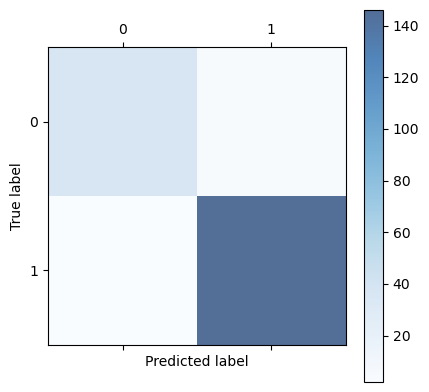

In [9]:

# Split the data into features and target and scale the features
X = data.iloc[:, 2:10]
# print the columns names of the data

print(f"features selected: ", X.columns)

y_dummy = data['Label']
y = data['Label'].map({'normal': 0, 'warp': 1, 'sphere': 1, 'paint' : 1})
# if Label is 'normal' then 0, else 1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.matshow(conf_matrix, cmap='Blues', alpha=0.7)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')